[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/andreaaraldo/machine-learning-for-networks/blob/master/02.regression/a.regression.ipynb)

In [3]:
import pandas as pd # For dataframes (tables)
import numpy as np # For arange
import matplotlib.pyplot as plt # For plots
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math # for sqrt
from sklearn.model_selection import cross_val_score, KFold
import pickle # to serialize/deserialize objects

from statistics import mean
import sys
sys.path.append("..")
from statistics import mean

from andrea_models import AndreaLinearRegression # In the course library
import feature_engineering

from andrea_models import AndreaLinearRegression # In the course library
import feature_engineering # From the course library

In [4]:
savefigures=False

In [9]:
dataset_to_use = 'A'
mydatasets_folder = "../Data/"
filename = "diabetes_binary_5050split_health_indicators_BRFSS2015.csv"
complete_name = mydatasets_folder+filename


In [11]:
df = pd.read_csv(complete_name)

In [12]:
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [13]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

Let's study the dependency between `label` and `KBytesReceived`

Let's first plot the data as they are, using a scatterplot.

See [mathplotlib documentation](https://matplotlib.org/tutorials/introductory/lifecycle.html) for more info (optional).

[(0.0, 6.0),
 (-0.5, 2.0),
 Text(0, 0.5, 'Diabete'),
 Text(0.5, 0, 'General Health')]

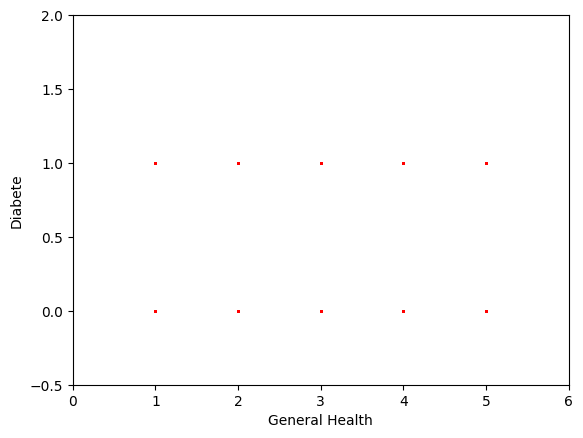

In [31]:
fig, ax = plt.subplots() # This creates just a canvas
ax.scatter(df['GenHlth'],df['Diabetes_binary'],color='red',
           s=1, label='all samples') # ax is the actual figure

# Customize the plot
ax.set(xlim=[0,6], ylim=[-0.5,2], ylabel="Diabete",
      xlabel="General Health")

# Train-test-split

We now divide the dataframe in a training and a test dataframe. By default, the dataset is split randomly (which is good).

In [20]:
df_train, df_test = train_test_split(df, test_size=0.3)
df_test.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
28927,0.0,1.0,0.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,9.0,4.0,3.0
14629,0.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,2.0,0.0,0.0,8.0,6.0,8.0
55004,1.0,1.0,1.0,1.0,32.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,4.0,0.0,7.0,0.0,1.0,7.0,6.0,8.0
10330,0.0,0.0,0.0,1.0,41.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,12.0,5.0,6.0
13078,0.0,1.0,1.0,1.0,23.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,13.0,5.0,3.0


Let's split the dataset in 70% training set, 30% test set.

Try to run the code above multiple times.

What do you observe? Is it a problem? How do you solve it?

To achieve reproducibility, set the seed with `random_state`.

In [27]:
df_train, df_test = train_test_split(df, test_size=0.3, random_state=19)
df_test.head()

print('Training samples ', df_train.shape[0], '; Test samples ', df_test.shape[0])

Training samples  49484 ; Test samples  21208


## Univariate Linear Regression

**Goal**: Predict `Diabetes_binary` based on `GenHlth`

In [33]:
df_train[['GenHlth','Diabetes_binary']]

,GenHlth,Diabetes_binary
9566,3.0,0.0
24349,2.0,0.0
33408,2.0,0.0
16178,2.0,0.0
6634,2.0,0.0
...,...,...
45218,2.0,1.0
17218,3.0,0.0
17738,3.0,0.0
39220,5.0,1.0


Let's separate the independent variables $X$ from the dependent variables $y$

In [35]:
# Scikit learn models expect matrices. We first transform
# the dataframe into an array
X_train = df_train[['GenHlth'] ].values

# Scikit learn models expect matrices with multiple
# rows and columns as X. X_train has instead just one column
# ==> The following code is necessary
X_train = X_train.reshape(-1,1)

y_train = df_train['Diabetes_binary'].values


# Do the same for the test dataset
X_test = df_test[[ 'GenHlth'] ].values.reshape(-1,1)
y_test = df_test['Diabetes_binary'].values

Let's train our first supervised learning model: an Ordinary Least Squares model.

Note: the main library for machine learning in Python is `scikit learn`. However `sklearn.LinearRegression` is quite poor, as it does not provide p-values and other information.

An alternative library to `sklearn` exists, which is called `statsmodel` is better, but its interface is different from the other models of `sklearn`.

I prepared the function `andrea_models.AndreaLinearRegression`, important at the beginning, to combine the best of `sklearn.LinearRegression` and `statsmodel`: it has tje same interface of `scikit learn` and the additional information of `statsmodel`.

In [36]:
model = AndreaLinearRegression()
model.fit(X_train, y_train, column_names=['GenHlth'])
model.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     9638.
Date:                Wed, 14 May 2025   Prob (F-statistic):               0.00
Time:                        16:20:11   Log-Likelihood:                -31512.
No. Observations:               49484   AIC:                         6.303e+04
Df Residuals:                   49482   BIC:                         6.305e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0148      0.006     -2.637      0.0

Now we have a trained model $h_{\theta*}(\cdot)$ stored in `model`. We can use it to predict new values.

In [51]:
NewGenHlth = np.array([1, 4, 5, 2, 1, 3]).reshape(-1,1)


predictedLabels = model.predict(NewGenHlth)
predictedLabels

array([0.16633605, 0.70984174, 0.8910103 , 0.34750461, 0.16633605,
       0.52867318])

To plot the model, we let it predict on an interval

In [52]:
interval = np.arange(0.5,2).reshape(-1,1)
h_values = model.predict(interval)
h_values

array([0.07575177, 0.25692033])

Let's plot the model. It is constructed so to minimize the distance between the blue points (training samples) and the line

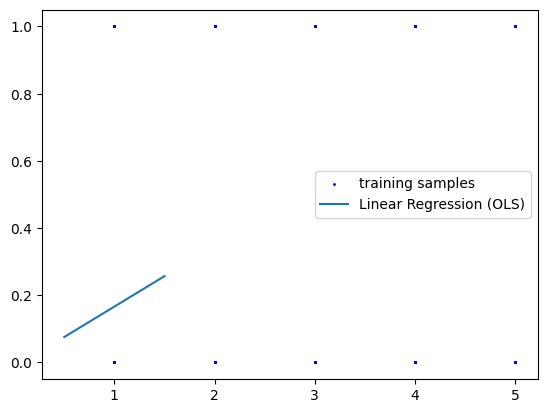

In [59]:
# fig, ax = plt.subplots() 
ax.clear()
ax.scatter(X_train,y_train,color='blue',s=1,
           label="training samples")

ax.plot(interval,h_values, label="Linear Regression (OLS)")
ax.legend()

fig

Let's evaluate the model on the test set

In [60]:
y_pred = model.predict(X_test)

Let us compare the true test labels and the predicted

In [61]:
pd.DataFrame({'true':y_test,'pred':y_pred})

,true,pred
0,1.0,0.347505
1,1.0,0.347505
2,0.0,0.166336
3,1.0,0.528673
4,0.0,0.709842
...,...,...
21203,0.0,0.891010
21204,0.0,0.528673
21205,1.0,0.709842
21206,1.0,0.891010


Let's compute the Mean Square Error (MSE)

In [62]:
MSE = mean_squared_error(y_test, y_pred)
MSE

0.20666066834087266

The Root MSE is easier to understand, since it is in the same unity of measurement of the target

In [63]:
RMSE_one_feature = math.sqrt(MSE)
RMSE_one_feature

0.4545994592395295

#### Dependency on the training set

If we change the training set, the model changes as well

In [64]:
df_train, df_test = train_test_split(df, test_size=0.3, random_state=2)

X_train = df_train[['GenHlth'] ].values.reshape(-1,1)
y_train = df_train['Diabetes_binary'].values
X_test = df_test[[ 'GenHlth'] ].values.reshape(-1,1)
y_test = df_test['Diabetes_binary'].values


model.fit(X_train, y_train, column_names=['Diabetes_binary'])
model.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     9833.
Date:                Wed, 14 May 2025   Prob (F-statistic):               0.00
Time:                        16:36:29   Log-Likelihood:                -31430.
No. Observations:               49484   AIC:                         6.286e+04
Df Residuals:                   49482   BIC:                         6.288e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
intercept          -0.0182      0.006     

Note that the coefficients are different. Let's plot it

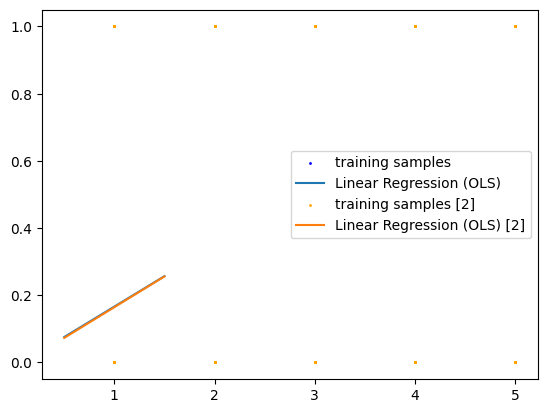

In [65]:
h_values = model.predict(interval)

ax.scatter(X_train,y_train,color='orange',s=1,
           label="training samples [2]")
ax.plot(interval,h_values, label="Linear Regression (OLS) [2]")
ax.legend()
fig

Let's train again a model on a different training set

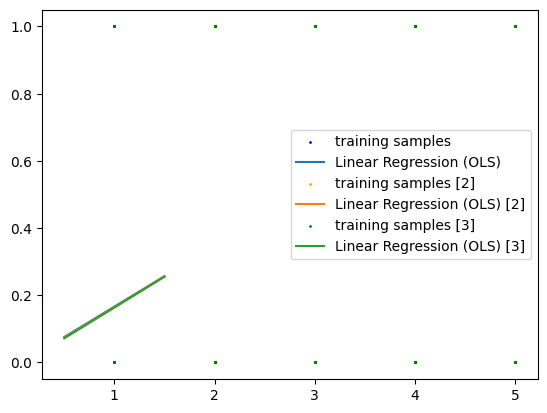

In [66]:
df_train, df_test = train_test_split(df, test_size=0.3, random_state=3)

X_train = df_train[['GenHlth'] ].values.reshape(-1,1)
y_train = df_train['Diabetes_binary'].values
X_test = df_test[[ 'GenHlth'] ].values.reshape(-1,1)
y_test = df_test['Diabetes_binary'].values


model.fit(X_train, y_train, column_names=['GenHlth'])
h_values = model.predict(interval)
ax.scatter(X_train,y_train,color='green',s=1,
           label="training samples [3]")
ax.plot(interval,h_values, label="Linear Regression (OLS) [3]")
ax.legend()
fig

## Multivariate Linear Regression

Can we improve the test loss if we use other features?

Have a first look at the more correlated features (see notebook on data exploration)

In [68]:
most_corr_feats = \
    feature_engineering.get_most_correlated(
            df_train)
most_corr_feats

GenHlth          PhysHlth    0.552
PhysHlth         DiffWalk    0.488
GenHlth          DiffWalk    0.478
Education        Income      0.466
Diabetes_binary  GenHlth     0.408
                             ...  
Stroke           Sex         0.003
AnyHealthcare    PhysHlth    0.001
CholCheck        Veggies    -0.001
Sex              Age        -0.001
BMI              Sex         0.000
Length: 231, dtype: float64

Let's add `Sex` among the regressors

In [70]:
cols = ['GenHlth', 'Sex']

# We do not need to reshape(-1,1) this time, as we
# have a matrix with two columns now.
X_train = df_train[cols ].values
model = AndreaLinearRegression()
model.fit(X_train, y_train, column_names=cols)
model.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.169
Method:                 Least Squares   F-statistic:                     5018.
Date:                Wed, 14 May 2025   Prob (F-statistic):               0.00
Time:                        16:45:13   Log-Likelihood:                -31346.
No. Observations:               49484   AIC:                         6.270e+04
Df Residuals:                   49481   BIC:                         6.272e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0440      0.006     -7.390      0.0

In [71]:
X_test = df_test[cols ].values
y_pred = model.predict(X_test)

In [72]:
MSE = mean_squared_error(y_test, y_pred)
RMSE_some_features = math.sqrt(MSE)
print('RMSE now: ', RMSE_some_features, '; RMSE with one feature: ',
      RMSE_1_feature)

RMSE now:  0.4558501255110434 ; RMSE with one feature:  0.4565460724045748


We improved our RMSE by also considering `Sex` ... BUT ...

**Attention**: Remember that start time is simply the time at which the experimenter who created the dataset had started each connection. The correlation between `StartTime` and the label is __artificial__, just because the experimenter first measured many low quality video sessions and then high quality. This would not be true in a real deployment


**DO NOT BE OBSESSED BY REDUCING THE ERROR, AND LOOK AT THE MEANING OF FEATURES!**

## Correct a bad model

Note that no coefficient is significant (look at the p-value). The model is "rubbish".



Remember that
$$
    \boldsymbol{\theta}^* = (X^T X)^{-1} X^T \textbf{y}
$$

Is $X^T X$ invertible?

### Constant features

In [74]:
cols = df_train.select_dtypes([np.number]).columns
cols

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [77]:
cols = cols.drop(['Diabetes_binary', 'Education', 'Income' ] )

In [78]:
non_constant_features = \
    feature_engineering.low_var_features(df_train[cols], threshold=0)
non_constant_features

['HighBP',
 'HighChol',
 'CholCheck',
 'BMI',
 'Smoker',
 'Stroke',
 'HeartDiseaseorAttack',
 'PhysActivity',
 'Fruits',
 'Veggies',
 'HvyAlcoholConsump',
 'AnyHealthcare',
 'NoDocbcCost',
 'GenHlth',
 'MentHlth',
 'PhysHlth',
 'DiffWalk',
 'Sex',
 'Age']

The following function returns the features whose variance is above 0

We must only use non-constant features

In [79]:
X_train = df_train[non_constant_features].values
X_test = df_test[non_constant_features].values

model = AndreaLinearRegression()
model.fit(X_train, y_train, column_names=non_constant_features)
model.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.305
Method:                 Least Squares   F-statistic:                     1142.
Date:                Wed, 14 May 2025   Prob (F-statistic):               0.00
Time:                        16:52:32   Log-Likelihood:                -26919.
No. Observations:               49484   AIC:                         5.388e+04
Df Residuals:                   49464   BIC:                         5.405e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
intercept               -0.6598 

The warnings disappear. Still, coefficients are no significant

In [80]:
y_pred = model.predict(X_test)
RMSE = math.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: ', RMSE)

RMSE:  0.41452803564044555


We improved a bit, but the performance is still bad.

### Collinearity

Let's check the most correlated features

In [81]:
most_corr_feats = \
    feature_engineering.get_most_correlated(
            df_train[non_constant_features])
most_corr_feats

GenHlth        PhysHlth    0.552
PhysHlth       DiffWalk    0.488
GenHlth        DiffWalk    0.478
MentHlth       PhysHlth    0.379
HighBP         Age         0.338
                           ...  
CholCheck      Smoker     -0.003
               Veggies    -0.001
AnyHealthcare  PhysHlth    0.001
Sex            Age        -0.001
BMI            Sex         0.000
Length: 171, dtype: float64

As expected, packets received/set and bytes received/set are highly correlated. Also the variables transformed to log are correlated with the original ones. We can remove the original ones. If we have KBytes, we can remove Bytes

In [82]:
to_remove = ['DiffWalk',
            ]

# Take from non_constant_features all the features except the ones in
# to_remove
cols_1 = []
for feat in non_constant_features:
    if feat not in to_remove:
        cols_1.append(feat)


X_train = df_train[cols_1].values
X_test = df_test[cols_1].values
model = AndreaLinearRegression()
model.fit(X_train, y_train, column_names=cols_1)
model.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                     1202.
Date:                Wed, 14 May 2025   Prob (F-statistic):               0.00
Time:                        16:54:36   Log-Likelihood:                -26940.
No. Observations:               49484   AIC:                         5.392e+04
Df Residuals:                   49465   BIC:                         5.409e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
intercept               -0.6729 

In [83]:
y_pred = model.predict(X_test)
RMSE = math.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: ', RMSE, '; RMSE with one feature: ',
      RMSE_one_feature)

RMSE:  0.41477710712085836 ; RMSE with one feature:  0.4545994592395295


After removing the most correlated features, the model improved a bit. Still, the model with one feature only is better.

Let's check the correlation among the remaining features.

In [84]:
most_corr_feats = \
    feature_engineering.get_most_correlated(df_train[cols_1])
most_corr_feats

GenHlth        PhysHlth    0.552
MentHlth       PhysHlth    0.379
HighBP         Age         0.338
               GenHlth     0.321
               HighChol    0.316
                           ...  
Stroke         Sex         0.003
AnyHealthcare  PhysHlth    0.001
CholCheck      Veggies    -0.001
Sex            Age        -0.001
BMI            Sex         0.000
Length: 153, dtype: float64

Let's remove all the features regarding Packets (as they are highly correlated with Bytes). Still, preserve the ones that have high correlation with the target.

In [85]:
feature_engineering.get_features_correlated_to_target(
                    df_train[cols_1+['Diabetes_binary']], 'Diabetes_binary')

Diabetes_binary         1.00
GenHlth                 0.41
HighBP                  0.38
BMI                     0.29
HighChol                0.29
Age                     0.28
PhysHlth                0.22
HeartDiseaseorAttack    0.21
PhysActivity           -0.16
Stroke                  0.13
CholCheck               0.11
MentHlth                0.09
Smoker                  0.09
HvyAlcoholConsump      -0.09
Veggies                -0.08
Fruits                 -0.05
NoDocbcCost             0.04
Sex                     0.04
AnyHealthcare           0.02
Name: Diabetes_binary, dtype: float64

The significance of some features is reinforced, but in general significance is weak.

In [86]:
y_pred = model.predict(X_test)
RMSE = math.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: ', RMSE, '; RMSE with one feature: ',
      RMSE_one_feature)

RMSE:  0.41477710712085836 ; RMSE with one feature:  0.4545994592395295


Performance is still bad. Let's remove other highly correlated features.

In [88]:
most_corr_feats = \
    feature_engineering.get_most_correlated(df_train[cols_1])
most_corr_feats

GenHlth        PhysHlth    0.552
MentHlth       PhysHlth    0.379
HighBP         Age         0.338
               GenHlth     0.321
               HighChol    0.316
                           ...  
Stroke         Sex         0.003
AnyHealthcare  PhysHlth    0.001
CholCheck      Veggies    -0.001
Sex            Age        -0.001
BMI            Sex         0.000
Length: 153, dtype: float64

In [89]:
cols_1

['HighBP',
 'HighChol',
 'CholCheck',
 'BMI',
 'Smoker',
 'Stroke',
 'HeartDiseaseorAttack',
 'PhysActivity',
 'Fruits',
 'Veggies',
 'HvyAlcoholConsump',
 'AnyHealthcare',
 'NoDocbcCost',
 'GenHlth',
 'MentHlth',
 'PhysHlth',
 'Sex',
 'Age']

# Cross-validation

Are we sure the model with these last features is the best? Or the good results just depend on the training/test set split?

In [90]:
X = df[cols_1].values
y = df['Diabetes_binary'].values


k_fold = KFold(n_splits=5, shuffle=True, random_state=6)

# Cross validation works with score, i.e., the higher the better.
# This is why the scoring function is the negative Mean Squared Error.
scores = cross_val_score(AndreaLinearRegression(),
                X, y, cv=k_fold,
                scoring='neg_mean_squared_error')
scores

array([-0.17351396, -0.17365673, -0.17465022, -0.17064074, -0.17477991])

In [91]:
mse_vector = -scores
mse_vector

array([0.17351396, 0.17365673, 0.17465022, 0.17064074, 0.17477991])

In [92]:
avg_mse = mean(mse_vector)
avg_mse

np.float64(0.17344831288258294)

In [93]:
math.sqrt(avg_mse)

0.41647126297330883

Let's try with one feature only

In [94]:
X = df['GenHlth'].values.reshape(-1,1)



scores = cross_val_score(AndreaLinearRegression(),
                X, y, cv=k_fold,
                scoring='neg_mean_squared_error')
math.sqrt( mean(-scores) )

0.4565887946063674